In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/train.zip"   # Update path if it's inside a folder
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted successfully to /content/data")


✅ Extracted successfully to /content/data


In [ ]:
import os

print(os.listdir("data/train")[:10])


['cats', 'dogs']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
DATA_DIR = "/content/data/train"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(train_generator, epochs=5, validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 632s 1s/step - accuracy: 0.6040 - loss: 0.7062 - val_accuracy: 0.7240 - val_loss: 0.5471
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 669s 987ms/step - accuracy: 0.7173 - loss: 0.5544 - val_accuracy: 0.7612 - val_loss: 0.4995
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 615s 984ms/step - accuracy: 0.7445 - loss: 0.5150 - val_accuracy: 0.7760 - val_loss: 0.4684
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 623s 998ms/step - accuracy: 0.7695 - loss: 0.4817 - val_accuracy: 0.7506 - val_loss: 0.4964
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 605s 968ms/step - accuracy: 0.7843 - loss: 0.4596 - val_accuracy: 0.7874 - val_loss: 0.4472


In [ ]:
model.save("cats_vs_dogs_model.h5")
print("✅ Model saved as cats_vs_dogs_model.h5")


✅ Model saved as cats_vs_dogs_model.h5


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

# Upload a test image
uploaded = files.upload()

# Load and preprocess
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("🐶 It's a Dog!")
else:
    print("🐱 It's a Cat!")


Saving images.jpeg to images.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
🐱 It's a Cat!


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

# Upload a test image
uploaded = files.upload()

# Load and preprocess
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("🐶 It's a Dog!")
else:
    print("🐱 It's a Cat!")


Saving download.jpeg to download.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
🐶 It's a Dog!


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2
base_model = MobileNetV2(input_shape=(128, 128, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze the base

# Build your custom classifier on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 376s 586ms/step - accuracy: 0.9107 - loss: 0.2084 - val_accuracy: 0.9514 - val_loss: 0.1167
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 378s 605ms/step - accuracy: 0.9559 - loss: 0.1091 - val_accuracy: 0.9580 - val_loss: 0.1115
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 362s 580ms/step - accuracy: 0.9595 - loss: 0.1040 - val_accuracy: 0.9518 - val_loss: 0.1173
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 362s 579ms/step - accuracy: 0.9608 - loss: 0.0991 - val_accuracy: 0.9550 - val_loss: 0.1141
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 365s 584ms/step - accuracy: 0.9613 - loss: 0.0935 - val_accuracy: 0.9566 - val_loss: 0.1073
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 369s 591ms/step - accuracy: 0.9633 - loss: 0.0964 - val_accuracy: 0.9552 - val_loss: 0.1107
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 364s 582ms/step - accuracy: 0.9639 - loss: 0.0884 - val_accuracy: 0.9518 - val_loss: 0.1096
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 363s 580ms/step - accuracy: 0.9681 -

In [ ]:
model.save("image_classifier_model.h5")


Evaluation


In [ ]:
# Use validation set as test set for evaluation
test_generator = val_generator

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"🧪 Test Accuracy: {test_acc:.2%}")
print(f"📉 Test Loss: {test_loss:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 461ms/step - accuracy: 0.9599 - loss: 0.1103
🧪 Test Accuracy: 95.82%
📉 Test Loss: 0.1078


157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 482ms/step


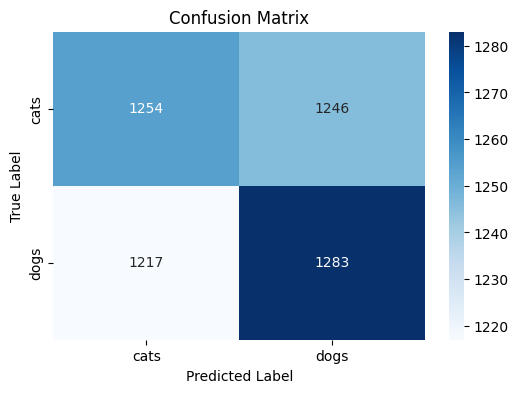


📋 Classification Report:
              precision    recall  f1-score   support

        cats       0.51      0.50      0.50      2500
        dogs       0.51      0.51      0.51      2500

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.51      5000
weighted avg       0.51      0.51      0.51      5000



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(test_generator)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()  # Binary classification

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Plot the matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os


In [ ]:
IMG_SIZE = (224, 224)  # MobileNetV2 expects 224x224
BATCH_SIZE = 32
DATA_DIR = "/content/data/train"  # adjust if your path is different

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  # You can increase later
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1170s 2s/step - accuracy: 0.9146 - loss: 0.2034 - val_accuracy: 0.9802 - val_loss: 0.0550
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1190s 2s/step - accuracy: 0.9764 - loss: 0.0656 - val_accuracy: 0.9802 - val_loss: 0.0526
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1146s 2s/step - accuracy: 0.9758 - loss: 0.0611 - val_accuracy: 0.9788 - val_loss: 0.0520
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1182s 2s/step - accuracy: 0.9806 - loss: 0.0533 - val_accuracy: 0.9828 - val_loss: 0.0487
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1159s 2s/step - accuracy: 0.9786 - loss: 0.0584 - val_accuracy: 0.9834 - val_loss: 0.0452


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"📊 Validation Accuracy: {val_acc:.2%}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9789 - loss: 0.0557
📊 Validation Accuracy: 98.24%


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"🧪 Test Accuracy: {test_acc:.2%}")
print(f"📉 Test Loss: {test_loss:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 452ms/step - accuracy: 0.9211 - loss: 0.2821
🧪 Test Accuracy: 92.40%
📉 Test Loss: 0.2817
